In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [1]:
# Load the dataset into a DataFrame
df = pd.read_csv("diabetes.csv")

# Display a few rows to verify the data loading
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

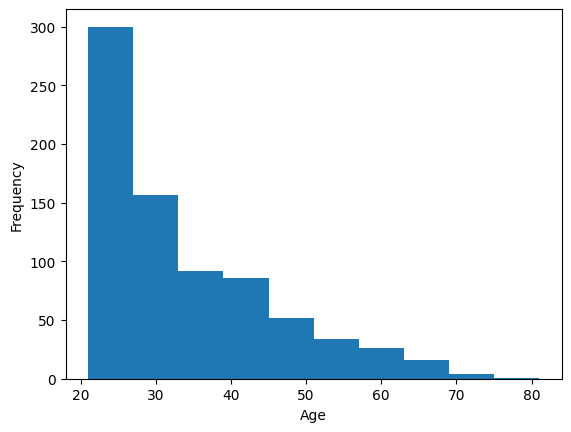

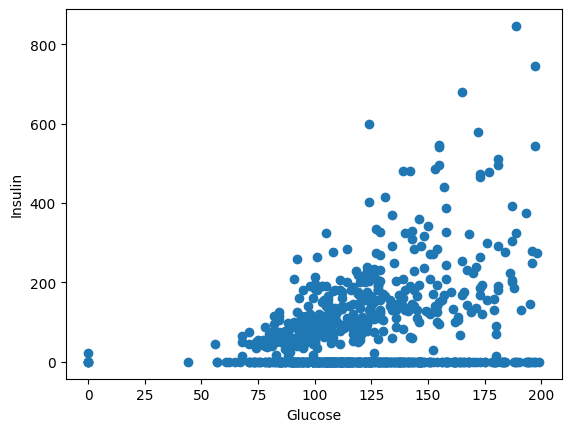

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [6]:
# Descriptive statistics
print(df.describe())

# Data visualization (examples)
import matplotlib.pyplot as plt

# Histogram of a feature
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of two features
plt.scatter(df['Glucose'], df['Insulin'])
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

In [28]:
# Handling missing values (replace with mean)
df.fillna(df.mean(), inplace=True)

# Handling outliers (remove values beyond a certain threshold)
df = df[(df['Glucose'] >= 70) & (df['Glucose'] <= 200)]
df = df[(df['Insulin'] >= 10) & (df['Insulin'] <= 600)]

# Check for missing values again
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [29]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X)

StandardScaler()

In [32]:
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.71592324 -1.12481123 -0.37151211 ... -0.6888672  -1.0528427
  -0.96916387]
 [-1.02747495  0.47547307 -2.47325705 ...  1.41113863  5.18932631
   0.21719106]
 [-0.09281981 -1.49154305 -1.66489361 ... -0.28286607 -0.81445718
  -0.47484931]
 ...
 [-0.40437152 -1.15815049 -1.01820286 ... -0.64686708  0.71003294
  -0.87030096]
 [ 2.08804218 -0.72474016  0.43685133 ... -0.01686533 -1.04107057
   3.18307836]
 [ 0.53028362 -0.05795503  0.11350595 ... -0.95486793 -0.82328627
  -0.07939767]]


In [33]:
X = standardized_data
Y = df['Outcome']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
classifier = svm.SVC(kernel='linear')

In [36]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [37]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7954545454545454


In [38]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.717948717948718


In [39]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.53028362  1.44231151  0.11350595 -0.96491164  0.21252316 -1.01086809
   0.18323037  1.99672344]]
[1]
The person is diabetic


C:\Users\moham\.conda\envs\test_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
